# Data Preprocessing {#sec-data-preprocessing}

## Overview

We have seen so far various techniques for data exploration. In this section, we introduce various pre-processing approaches that
may be useful when various models are used. In particular, we will look into

- Dataset scaling
- Dataset normalization

We will be using Python and the ```sklearn.preprocessing```  module.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
np.random.seed(42)

In [14]:
size = 300
mu = [1.0, 1.0]
cov_mat = [[2.0, 0.0],[0.0, 0.8]]

In [18]:
X = np.random.multivariate_normal(mean=mu, cov=cov_mat, size=size)
#print(X)

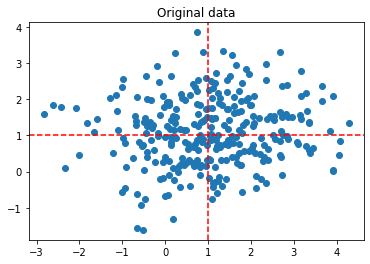

In [27]:
x=[]
y=[]

for point in X:
    x.append(point[0])
    y.append(point[1])

plt.scatter(x, y)
plt.title("Original data")
plt.axhline(mu[0], color='r', linestyle='--')
plt.axvline(mu[1], color='r', linestyle='--')
plt.show()

### Data scaling

Algorithms such as logistic regression, see @sec-logistic-regression, or support vector machines, see @sec-support-vector-machines, 
perform better when the dataset has feature-wise null mean. Thus being able to scale the dataset is very important.
In this section we will review

- Zero-centering
- $z$-score scaling
- Min-max scaling
- Range scaling
- Robust scaling

As you can understand from the plethora of the methodologies we will reviee, each one of these has advantages and disadvantages
that we will mention as we discuss the particular approach.

**Zero-centering**

In this approach, every variable entering the model is scaled according to

$$\hat{x}_i = x_i - E\left[X\right]$$

where $E\left[X\right]$ represents the dataset mean. The advantage of zero-scaling is that it is reversible
and it does not alter the relationships among samples. Furthermore, zero-scaling  allows us to exploit the symmetry
that some activation functions have and thus driving the overall model convergence in faster pace.
For an 1D dataset, zero-scaling is trivial to perform as the code snippet below demonstrates.

```python
import numpy as np

x = [float(i) for i in range (1, 50)]
mean = np.mean(x)
x = [i - mean for i in x]
```

In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

#### Min-Max scaling

Min-max standardization scales values in a feature to be between 0 and 1. However, with sklearn we have more freedom with this.
Min-max standardization has a harder time dealing with outliers, so if our data have many outliers, it is generally better to stick with z-score standardization

In [30]:
ss = MinMaxScaler(feature_range=(-1, 1))
X_mm = ss.fit_transform(X)

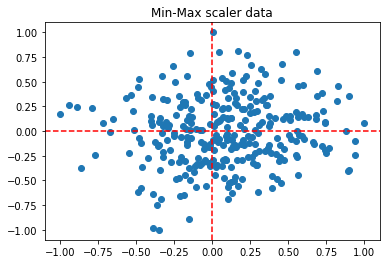

In [32]:
x_mm=[]
y_mm=[]

for point in X_mm:
    x_mm.append(point[0])
    y_mm.append(point[1])

plt.scatter(x_mm, y_mm)
plt.title("Min-Max scaler data")
plt.axhline(0.0, color='r', linestyle='--')
plt.axvline(0.0, color='r', linestyle='--')
plt.show()

#### z-score or standard scaling

z-score standardization scales values to have a mean of 0 and a variance of 1, allowing for negative values.
z-score standardization ensures that outliers are handled more properly but will not guarantee that the data will end up on the exact same scale

In [ ]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [ ]:
x_ss=[]
y_ss=[]

for point in X_ss:
    x_ss.append(point[0])
    y_ss.append(point[1])

plt.scatter(x_ss, y_ss)
plt.title("Standard scaler data")
plt.axhline(0.0, color='r', linestyle='--')
plt.axvline(0.0, color='r', linestyle='--')
plt.show()

In [34]:
rs = RobustScaler()
X_rs = rs.fit_transform(X)

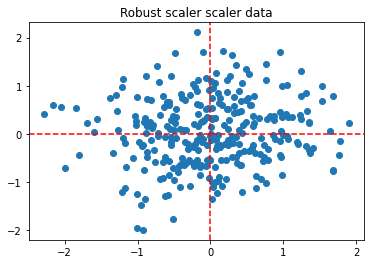

In [35]:
x_rs=[]
y_rs=[]

for point in X_rs:
    x_rs.append(point[0])
    y_rs.append(point[1])

plt.scatter(x_rs, y_rs)
plt.title("Robust scaler scaler data")
plt.axhline(0.0, color='r', linestyle='--')
plt.axvline(0.0, color='r', linestyle='--')
plt.show()

### Data imputation

#### End-tail imputation

End-of-tail imputation is a special type of arbitrary imputation in which the constant value we use to fill in missing values is based on the distribution of the feature. The value is at the end of the distribution. This method still has the benefit of calling out missing values as being different from the rest of the values (which is what imputing with the mean/median does) but also has the added benefit of making the values that we pick more automatically generated and easier to impute

- If our variable is normally distributed, our arbitrary value is the mean + 3 × the standard deviation. Using 3 as a multiplier is common but also can be changed at the data scientist’s discretion.
- If our data are skewed, then we can use the IQR (interquartile range) rule to place values at either end of the distribution by adding 1.5 times the IQR (which is the 75th percentile minus the 25th percentile) to the 75th or subtracting 1.5 times the IQR from the 25th percentile.

#### Mode Imputation

As with numerical data, there are many ways we can impute missing categorical data. One such method is called the most-frequent 
category imputation or mode imputation. As the name suggests, we simply replace missing values with the most common non-missing value:

#### Arbitrary value imputation

Similar to arbitrary value imputation for numerical values, we can apply this to categorical values 
by either creating a new category, called Missing or Unknown, that the machine learning algorithm will have to learn about or by making an assumption about the missing values and filling in the values based on that assumption.

#### Binning

Binning refers to the act of creating a new categorical (usually ordinal) feature from a numerical or categorical feature. The most common way to bin data is to group numerical data into bins based on threshold cutoffs, similar to how a histogram is created.